<a href="https://colab.research.google.com/github/Lakshika-Swarnamali/Diagrams/blob/master/FYP_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [ ]:
log = pd.read_csv("https://raw.githubusercontent.com/GihanKLG/TwitterCovid19Dataset/master/2020-10-12.csv",encoding='latin1')
log[(log['lang'] == 'en')].to_csv("out.csv", index=False)
log = pd.read_csv('out.csv', lineterminator='\n',encoding='latin1')
log.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sun Oct 11 23:59:54 +0000 2020,NaN,NaN,NaN,0,1315442032651927552,BalutSmithy,1.315403e+18,1.296441e+18,en,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@BalutSmithy @StephenJohn59 @jaketapper @kaitl...,https://twitter.com/NorthLapp/status/131544203...,Sun Mar 25 19:25:10 +0000 2012,NorthLapp,False,"I need more followers, I will expose the truth...",1979,1291,1805,28,NaN,Renee J North Lapp,NorthLapp,12503,NaN,NaN,False
1,NaN,Sun Oct 11 23:59:56 +0000 2020,NaN,NaN,NaN,0,1315442037286678529,NaN,NaN,NaN,en,NaN,NaN,1,1.315348e+18,PetraCEsser1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PetraCEsser1: @HSRetoucher Thank you. I am...,https://twitter.com/johncoppa44/status/1315442...,Fri Feb 26 09:25:23 +0000 2016,johncoppa44,True,NaN,3031,31,287,1,NaN,john coppa,johncoppa44,7490,NaN,NaN,False
2,NaN,Sun Oct 11 23:59:56 +0000 2020,NaN,NaN,https://twitter.com/onlinelonghorn/status/1315...,0,1315442039870324736,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",*corona liked this post* https://t.co/3mAPNWNAfK,https://twitter.com/ivythekingrat/status/13154...,Mon Dec 11 16:09:37 +0000 2017,ivythekingrat,False,nope,4001,95,153,0,puerto rico,rat zone,ivythekingrat,1633,NaN,NaN,False
3,NaN,Sun Oct 11 23:59:55 +0000 2020,SidNaaz,NaN,NaN,0,1315442036028260353,NaN,NaN,NaN,en,NaN,NaN,120,1.315334e+18,SidNaaz13Dstny,"<a href=""http://twitter.com/download/android"" ...",RT @SidNaaz13Dstny: Points\n\n1. Salman Sir #S...,https://twitter.com/Tejakshi1/status/131544203...,Sat Jan 04 06:50:54 +0000 2020,Tejakshi1,False,Ã°ÂÂ¤Â¡,57815,282,579,0,NaN,tejakshi shetty,Tejakshi1,39117,NaN,NaN,False
4,NaN,Sun Oct 11 23:59:55 +0000 2020,NaN,NaN,NaN,0,1315442033331507203,NaN,NaN,NaN,en,NaN,NaN,10711,1.315345e+18,CLewandowski_,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @CLewandowski_: WHO now advising against lo...,https://twitter.com/LoisR52511816/status/13154...,Sun Aug 02 16:10:47 +0000 2020,LoisR52511816,True,NaN,28886,88,277,0,NaN,LoisR,LoisR52511816,13602,NaN,NaN,False


In [ ]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
data = pd.read_csv("https://raw.githubusercontent.com/GihanKLG/TwitterCovid19Dataset/master/2020-10-12.csv", index_col ="id")
 
# retrieving columns by indexing operator
# first = data["user_name"]
my_column_names = [ 'user_name','text']
df = pd.DataFrame(data=data, columns=my_column_names)
lda = pd.DataFrame(data=data, columns=my_column_names)
# print(first)
# print(first['id', 'user_name','retweet_count','retweet_id'])
print(df)
# df.head(5)

                              user_name                                               text
id                                                                                        
1315442032651927552  Renee J North Lapp  @BalutSmithy @StephenJohn59 @jaketapper @kaitl...
1315442033507684352             🎃 leh 🎃  RT @dougraz: todo dia pensando será se eu ja p...
1315442037286678529          john coppa  RT @PetraCEsser1: @HSRetoucher Thank you. I am...
1315442040172425216      Reivindicación               @PedroAzzola https://t.co/RxL0DAaQaI
1315442039870324736            rat zone   *corona liked this post* https://t.co/3mAPNWNAfK
...                                 ...                                                ...
1315457129835302914     AnnieMoonIsBlue  RT @BillKristol: On President Trump and Dr. Fa...
1315457130460327938        Dardo Boggia  RT @osvaldo_quiroga: Lo entrevisté muchísimas ...
1315457129847889921                Shay    ISOLATION\n\nNot COVID. https://t.co/d4j0jm7j0e

In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

125905

In [ ]:
 # number of unique retweets
df.loc[df['is_retweet']].text.unique().size

24446

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
40345,RT @RBReich: So let me get this straight: wear...,4200
39539,RT @OliviaTroye: The latest @realDonaldTrump c...,3235
48560,RT @joleelachelle: y’all are going out during ...,2950
34694,RT @GFiuza_Oficial: Com o reconhecimento pela ...,1284
38101,"RT @MarshallCohen: Apparently, the Trump campa...",1208
49564,RT @lordxred: Telling my kids I survived 3 glo...,1133
36373,RT @JoeBiden: When President Trump was told on...,1119
43717,"RT @WhiteHouse: ""There is simply no historical...",1035
34053,RT @EmeraldRobinson: RIP in 2020 to the credib...,1011
49273,"RT @larryelder: 'Irreparable damage': Over 6,0...",854


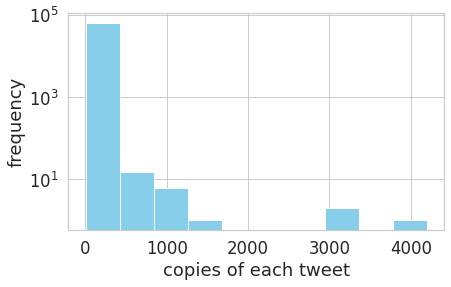

In [ ]:
# number of times each tweet appears
counts = df.groupby(['text']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.hist(counts, color = "skyblue")
plt.show()

In [ ]:
def find_retweeted(text):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)

def find_mentioned(text):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)  

def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)  

In [ ]:
df['retweeted'] = df.text.apply(find_retweeted)
df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)
df

,user_name,text,is_retweet,retweeted,mentioned,hashtags
id,,,,,,
1315442032651927552,Renee J North Lapp,@BalutSmithy @StephenJohn59 @jaketapper @kaitl...,False,[],"[@BalutSmithy, @StephenJohn59, @jaketapper, @k...",[]
1315442033507684352,🎃 leh 🎃,RT @dougraz: todo dia pensando será se eu ja p...,True,[@dougraz],[],[]
1315442037286678529,john coppa,RT @PetraCEsser1: @HSRetoucher Thank you. I am...,True,[@PetraCEsser1],[@HSRetoucher],[]
1315442040172425216,Reivindicación,@PedroAzzola https://t.co/RxL0DAaQaI,False,[],[@PedroAzzola],[]
1315442039870324736,rat zone,*corona liked this post* https://t.co/3mAPNWNAfK,False,[],[],[]
...,...,...,...,...,...,...
1315457129835302914,AnnieMoonIsBlue,RT @BillKristol: On President Trump and Dr. Fa...,True,[@BillKristol],[],[]
1315457130460327938,Dardo Boggia,RT @osvaldo_quiroga: Lo entrevisté muchísimas ...,True,[@osvaldo_quiroga],[],[]
1315457129847889921,Shay,ISOLATION\n\nNot COVID. https://t.co/d4j0jm7j0e,False,[],[],[]


In [ ]:
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
print(hashtags_list_df)


                                        hashtags
id                                              
1315442036028260353                   [#SidNaaz]
1315442038180114434                   [#GodWins]
1315442037802627074                   [#COVID19]
1315442033264406530       [#WHO, #BelieveTheWHO]
1315442035881578496                 [#Scamdemic]
...                                          ...
1315457121912315904          [#scamdemic, #They]
1315457127276785665             [#trumpfailures]
1315457126916132870                [#TESTIMONIO]
1315457130158329857        [#Broward, #COVID-19]
1315457130762317824  [#EnCombateContraElCovid19]

[22211 rows x 1 columns]


In [ ]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
print(flattened_hashtags_df)

                         hashtag
0                       #SidNaaz
1                       #GodWins
2                       #COVID19
3                           #WHO
4                 #BelieveTheWHO
...                          ...
47088             #trumpfailures
47089                #TESTIMONIO
47090                   #Broward
47091                  #COVID-19
47092  #EnCombateContraElCovid19

[47093 rows x 1 columns]


In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size
print(flattened_hashtags_df)

                         hashtag
0                       #SidNaaz
1                       #GodWins
2                       #COVID19
3                           #WHO
4                 #BelieveTheWHO
...                          ...
47088             #trumpfailures
47089                #TESTIMONIO
47090                   #Broward
47091                  #COVID-19
47092  #EnCombateContraElCovid19

[47093 rows x 1 columns]


In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

print(popular_hashtags)

             hashtag  counts
0           #COVID19    5899
1       #coronavirus    1025
2           #Covid19     673
3             #COVID     630
4       #Coronavirus     550
...              ...     ...
10155     #Oncologia       1
10156  #OnceNoticias       1
10157      #OnDemand       1
10158    #OnAMission       1
10159   #zoomclasses       1

[10160 rows x 2 columns]


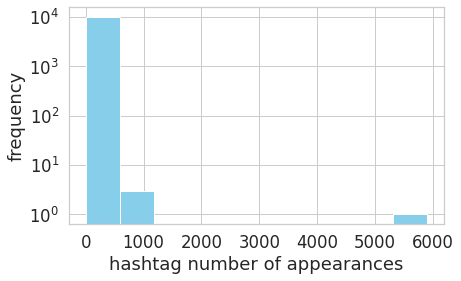

In [ ]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.hist(counts, color = "skyblue")
plt.show()

In [ ]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])
print(popular_hashtags_set)

{'#POTUS', '#MAGA2020LandslideVictory', '#photooftheday', '#VoteBlueDownBallot', '#VoteBidenHarris2020', '#China', '#trump2020', '#HongKong', '#VoteOutEveryRepublican', '#DitchMitch', '#staysafe', '#Corona', '#Atenci', '#IOWA', '#Plandemia', '#G1', '#ElPeorGobiernoDeLaHistoria', '#COVIDIOTS', '#virus', '#TrumpCrimeFamily', '#Acarigua', '#SupportIA', '#AmyConeyBa', '#EndPoliceBrutalityinNigeria', '#JUNGKOOK', '#BREAKING', '#loveorhost', '#istandwit', '#TeamKentucky', '#NBA', '#coli', '#EnComba', '#WorldMentalHealthDay', '#EndAsuuStrikeNow', '#StayHome', '#KAG', '#corona', '#fantasy', '#NBAFinals', '#FactsMatter', '#Australia', '#StopAliyev', '#COVID', '#SiempreM', '#EEUU', '#TyphoidMary', '#CandaceOwens', '#EnCombateContraE', '#LaIslaDeLasTentanciones6', '#Democrats', '#Protecci', '#travel', '#COVID19', '#TrumpSuperSpreader', '#France', '#UnitedStates', '#Francia', '#FartingBigfoot', '#vaccines', '#OpsYustisiPoldaSulsel', '#EnVivo', '#ChavismoV', '#AI', '#TaatiProkesHindariKerumunan', '

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

print(popular_hashtags_list_df)

                                                              hashtags             popular_hashtags
id                                                                                                 
1315442037802627074                                         [#COVID19]                   [#COVID19]
1315442033264406530                             [#WHO, #BelieveTheWHO]                       [#WHO]
1315442035881578496                                       [#Scamdemic]                 [#Scamdemic]
1315442032861564928                                         [#COVID19]                   [#COVID19]
1315442033851543552                                        [#BREAKING]                  [#BREAKING]
...                                                                ...                          ...
1315457125016121345  [#BolsonaroOrgulhaOBrasil, #Bolsonaro2022, #CO...                   [#COVID19]
1315457121912315904                                [#scamdemic, #They]          [#scamdemic, #They]


In [ ]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

print(hashtag_vector_df)

                                popular_hashtags  ...  #GOPBetrayedAmerica
id                                                ...                     
1315442037802627074                   [#COVID19]  ...                    0
1315442033264406530                       [#WHO]  ...                    0
1315442035881578496                 [#Scamdemic]  ...                    0
1315442032861564928                   [#COVID19]  ...                    0
1315442033851543552                  [#BREAKING]  ...                    0
...                                          ...  ...                  ...
1315457125016121345                   [#COVID19]  ...                    0
1315457121912315904          [#scamdemic, #They]  ...                    0
1315457126916132870                [#TESTIMONIO]  ...                    0
1315457130158329857                  [#COVID-19]  ...                    0
1315457130762317824  [#EnCombateContraElCovid19]  ...                    0

[17627 rows x 545 column

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

# calculate the correlation matrix
correlations = hashtag_matrix.corr()
print (correlations)
# # plot the correlation matrix
# plt.figure(figsize=(10,10))
# sns.heatmap(corrleations,
#     cmap='RdBu',
#     vmin=-1,
#     vmax=1,
#     square = True,
#     cbar_kws={'label':'correlation'})
# plt.show()

                                 #POTUS  ...  #GOPBetrayedAmerica
#POTUS                         1.000000  ...            -0.000901
#MAGA2020LandslideVictory     -0.000950  ...            -0.001078
#photooftheday                -0.000705  ...            -0.000799
#VoteBlueDownBallot           -0.000736  ...            -0.000834
#VoteBidenHarris2020          -0.001328  ...            -0.001506
...                                 ...  ...                  ...
#VenezolanosVaradosEnColombia -0.001019  ...            -0.001156
#coronavirus                  -0.006991  ...            -0.007928
#nzpol                        -0.000705  ...            -0.000799
#Innovacion                   -0.000974  ...            -0.001104
#GOPBetrayedAmerica           -0.000901  ...             1.000000

[544 rows x 544 columns]


In [ ]:
# import seaborn as sn
# import matplotlib.pyplot as plt

# sn.heatmap(correlations, annot=True)
# plt.show()

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
def remove_links(text):
    '''Takes a string and removes web links from it'''
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    return text

def remove_users(text):
    '''Takes a string and removes retweet and @user information'''
    text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', text) # remove retweet
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text) # remove tweeted at
    return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(text, bigrams=False):
    text = remove_users(text)
    text = remove_links(text)
    text = text.lower() # lower case
    text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
    text = re.sub('\s+', ' ', text) #remove double spacing
    text = re.sub('([0-9]+)', '', text) # remove numbers
    tweet_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [ ]:
lda['clean_tweet'] = lda.text.apply(clean_tweet)
lda.head(10)

,user_name,text,clean_tweet
id,,,
1315442032651927552,Renee J North Lapp,@BalutSmithy @StephenJohn59 @jaketapper @kaitl...,seem fauci also blame mishandl pandem birx pr...
1315442033507684352,🎃 leh 🎃,RT @dougraz: todo dia pensando será se eu ja p...,todo dia pensando será se eu ja peguei covid ...
1315442037286678529,john coppa,RT @PetraCEsser1: @HSRetoucher Thank you. I am...,thank speak tongu angel bring chip blood brai...
1315442040172425216,Reivindicación,@PedroAzzola https://t.co/RxL0DAaQaI,
1315442039870324736,rat zone,*corona liked this post* https://t.co/3mAPNWNAfK,corona like post
1315442032350027780,ᴮᴱ#LAKERS 2020 NBA Champions #Titans (5-0),https://t.co/VNNyjhzXxt https://t.co/DRIUE2K2VV,
1315442036028260353,tejakshi shetty,RT @SidNaaz13Dstny: Points\n\n1. Salman Sir #S...,point salman sir #sidnaaz shipper h❤️ salma...
1315442038142390274,Angel Duarte Hurtado,RT @AristeguiOnline: Paga México más de 180 mi...,paga méxico má de millon de dl para garantiz...
1315442033331507203,LoisR,RT @CLewandowski_: WHO now advising against lo...,advis lockdown disproportion hurt poor—which ...


In [ ]:
# Applying Topic Modelling
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(lda['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
# tf_feature_names

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,…,8684.6,pandem,7489.9,…,5993.9,…,4205.1,…,13692.0,…,4977.5,de,19647.1,covid,10327.5,…,13180.9,…,12499.0
1,de,5287.7,go,5215.8,lockdown,2808.7,trump,3540.0,covid,13658.5,de,2061.3,la,12528.0,…,8515.6,covid,9242.6,mask,8518.4
2,comment,3803.1,covid,3730.4,end,1752.9,fauci,3324.2,’,5297.1,lockdown,1882.5,el,10200.0,new,3406.1,trump,7783.7,wear,8320.0
3,amp,3731.8,y,3490.1,la,1617.4,respons,2727.1,’t,4764.4,covid,1851.8,covid,9239.6,trump,3403.1,’,7099.2,live,6440.9
4,en,3725.1,hear,3462.0,call,1452.4,say,2693.7,peopl,3890.5,e,1712.1,…,8948.0,american,3316.3,twitter,3011.7,get,5534.1
5,campaign,3665.6,’all,3364.1,cdc,1429.4,dr,2419.9,pandem,3378.3,que,1696.8,que,8931.3,death,3238.1,test,2868.3,let,5444.3
6,latest,3548.1,song,3288.1,sign,1426.3,ad,2344.8,like,3353.6,current,1599.5,en,6718.1,die,3231.9,he,2856.1,person,5308.0
7,fauci,3491.5,…,2490.4,coronaviru,1357.5,coronaviru,2192.2,get,3315.6,com,1553.7,por,4229.1,case,2977.2,dr,2705.2,pandem,5113.0
8,use,3445.2,flu,2030.1,scientist,1257.8,new,1731.6,trump,3244.4,uma,1513.1,lo,4081.5,day,2647.0,immun,2514.2,save,4929.1
9,dr,3443.5,tell,2020.5,chri,1152.1,campaign,1724.5,amp,2961.3,pode,1483.1,se,3793.2,one,2384.9,coronaviru,2472.9,choic,4434.1


In [ ]:
# df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
# df['is_retweet'].sum()  # number of retweets

In [ ]:
# df.groupby(['text']).size().reset_index(name='counts')\
#   .sort_values('counts', ascending=False).head(10)

In [ ]:
# tweets = pd.DataFrame(df)
# def find_mentioned(tweet):
#     '''This function will extract the twitter handles of people mentioned in the tweet'''
#     return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
# def find_hashtags(tweet):
#     '''This function will extract hashtags'''
#     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
# # make new columns for mentioned usernames and hashtags
# tweets['mentioned'] = tweets.text.apply(find_mentioned)
# tweets['hashtags'] = tweets.text.apply(find_hashtags)
# tweets.head(5)

In [ ]:
# # number of unique hashtags
# flattened_hashtags_df = pd.DataFrame(tweets)
# flattened_hashtags_df['hashtags'].unique().size
# flattened_hashtags_df.head(5)

In [ ]:
# popular_hashtags = list(log['hashtags'])
# popular_hashtags = [x for x in all_tweets if str(x) != 'nan']

# popular_hashtags[:5]

In [ ]:
# popular_hash['hashtag'].unique().size
# popular_hashtags[:5]

In [ ]:
# # take hashtags which appear at least this amount of times
# min_appearance = 1000
# # find popular hashtags - make into python set for efficiency
# popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtags'])
# popular_hashtags_set[:5]

In [ ]:
# my_stopwords = nltk.corpus.stopwords.words('english')
# word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
# my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
# # cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('\s+', ' ', tweet) #remove double spacing
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords
# tweet_token_list = [word_rooter(word) if '#' not in word else word
#                         for word in tweet_token_list] # apply word rooter
# if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet
# tweets['clean_tweet'] = tweets.full_text.apply(clean_tweet)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # the vectorizer object will be used to transform text to vector form
# vectorizer = CountVectorizer(max_df=0.9, min_df=100, token_pattern='\w+|\$[\d\.]+|\S+')
# # apply transformation
# tf = vectorizer.fit_transform(tweets['text']) #.toarray()
# # tf_feature_names tells us what word each column in the matric represents
# tf_feature_names = vectorizer.get_feature_names()
# tf.shape # --> (200000, 2296)

In [ ]:
# from sklearn.decomposition import LatentDirichletAllocation
# number_of_topics = 10
# model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45) # random state for reproducibility
# # Fit data to model
# model.fit(tf)